In [445]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [446]:
cd /content/drive/MyDrive/ECE4076_Lab2

/content/drive/MyDrive/ECE4076_Lab2


In [447]:
import os
import numpy as np
import math
import cv2
from matplotlib import pyplot as plt

In [448]:
student_id = 31975658 # Add in your student ID
student_name = "Sihan Ren" # Add in your student name

# Task 1: Draw test points on the left image

In [449]:
# Write your code here

im_left = cv2.cvtColor(cv2.imread('left.jpg'), cv2.COLOR_BGR2GRAY)  

print('The characteristics of the left image is', im_left.shape)


xL = np.array([[337, 196, 1], 
               [467, 289, 1],
               [252, 169, 1],
               [262, 255, 1],
               [241, 135, 1]])
x_L, y_L, _ = xL.T

print("\nxL is\n", xL, "\nx is\n", x_L, "\ny is\n", y_L)

The characteristics of the left image is (384, 512)

xL is
 [[337 196   1]
 [467 289   1]
 [252 169   1]
 [262 255   1]
 [241 135   1]] 
x is
 [337 467 252 262 241] 
y is
 [196 289 169 255 135]


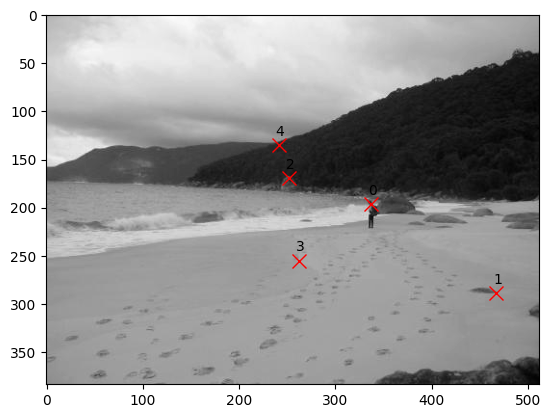

In [450]:
# Show results here

## plot the image
plt.imshow(im_left, cmap = 'gray')
plt.plot(x_L, y_L, 'rx', markersize = 10)

## plot the text
for i in range(x_L.shape[0]):
  plt.text(x_L[i] - 3, y_L[i] - 10, i)

plt.show()

# Task 2: Use Homography to find right image points


In [451]:
# Write your code here

im_right = cv2.cvtColor(cv2.imread('right.jpg'), cv2.COLOR_BGR2GRAY)

## Homography matrix is a kind of rotation matrix
H = np.array([[1.6010, -0.0300, -317.9341], 
              [0.1279, 1.5325, -22.5847],
              [0.0007, 0, 1.2865]])

print('Homography matrix is\n', H)

xR = np.matmul(H, xL.T)

print("\nxR is\n", xR)

xR = xR.T

print("\nxR transpose is\n", xR)

xR = xR / xR[:, 2].reshape(5, 1)

print("\nxR after normalize and transpose is\n", xR)

x_R = xR[:, 0]
y_R = xR[:, 1]

Homography matrix is
 [[ 1.601000e+00 -3.000000e-02 -3.179341e+02]
 [ 1.279000e-01  1.532500e+00 -2.258470e+01]
 [ 7.000000e-04  0.000000e+00  1.286500e+00]]

xR is
 [[215.7229 421.0629  80.4479  93.8779  63.8569]
 [320.8876 480.0371 268.6386 401.7126 215.1267]
 [  1.5224   1.6134   1.4629   1.4699   1.4552]]

xR transpose is
 [[215.7229 320.8876   1.5224]
 [421.0629 480.0371   1.6134]
 [ 80.4479 268.6386   1.4629]
 [ 93.8779 401.7126   1.4699]
 [ 63.8569 215.1267   1.4552]]

xR after normalize and transpose is
 [[141.69922491 210.77745665   1.        ]
 [260.97861659 297.53136234   1.        ]
 [ 54.99207054 183.63428806   1.        ]
 [ 63.86686169 273.29246888   1.        ]
 [ 43.88187191 147.83308136   1.        ]]


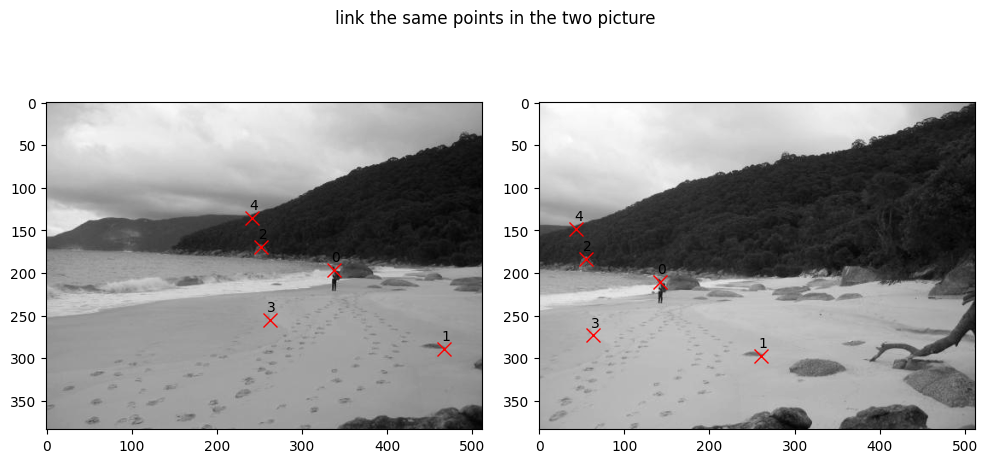

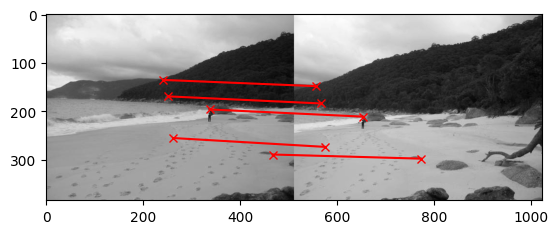

In [452]:
# Show results here

fig = plt.figure(figsize = (10, 5))
fig.suptitle("link the same points in the two picture")

plt.subplot(1, 2, 1)
plt.imshow(im_left, cmap = 'gray')
plt.plot(x_L, y_L, 'rx', markersize = 10)
## plot the text
for i in range(x_L.shape[0]):
  plt.text(x_L[i] - 3, y_L[i] - 10, i)

plt.subplot(1, 2, 2)
plt.imshow(im_right, cmap = 'gray')
plt.plot(x_R, y_R, 'rx', markersize = 10)
## plot the text
for i in range(x_R.shape[0]):
  plt.text(x_R[i] - 3, y_R[i] - 10, i)

plt.tight_layout()
plt.show()

plt.imshow(np.hstack((im_left, im_right)), cmap = 'gray')
for i in range(xL.shape[0]):
  x = [x_L[i], x_R[i] + im_left.shape[1]]
  y = [y_L[i], y_R[i]]
  plt.plot(x, y, 'rx-')

plt.show()

In [453]:
# Demonstrate your understanding by answering the question below:
# Describe the process of calculating a homography matrix. Ensure you list out the key steps

## Answer: First find the point pairs between 2 images, which means pair up the same points inside 2 different images.
## Then, because image is consist of pixels, so using the same pixels which are in different locations we can calculate the 
## transformation of the pixels, thus the whole image.

# Task 3: Bilinear interpolation of the right image

In [454]:
# Write your code here

def bi_interpolation(im, col, row):
  col = round(col)
  row = round(row)
  
  col_1 = col - 1
  col_2 = col + 1
  row_1 = row - 1
  row_2 = row + 1

  Q_11 = im[row_1, col_1]
  Q_12 = im[row_2, col_1]
  Q_21 = im[row_1, col_2]
  Q_22 = im[row_2, col_2]
  
  f_x_y1 = (col_2 - col) / (col_2 - col_1) * Q_11 + (col - col_1) / (col_2 - col_1) * Q_21
  f_x_y2 = (col_2 - col) / (col_2 - col_1) * Q_12 + (col - col_1) / (col_2 - col_1) * Q_22  

  f_x_y = (row_2 - row) / (row_2 - row_1) * f_x_y1 + (row - row_1) / (row_2 - row_1) * Q_22
  
  return f_x_y 

In [455]:
def bi_interpolation(im, col, row):

    col_1 = int(col) 
    col_2 = col_1 + 1 
    row_1 = int(row) 
    row_2 = row_1 + 1 

    Q_11 = im[row_1, col_1]
    Q_12 = im[row_2, col_1]
    Q_21 = im[row_1, col_2]
    Q_22 = im[row_2, col_2]
    
    ## u and v are relative distance of 4 points
    u = (col - col_1) / (col_2 - col_1)
    v = (row - row_1) / (row_2 - row_1)

    interpolated_value = (1 - u) * (1 - v) * Q_11 + u * (1 - v) * Q_21 + (1 - u) * v * Q_12 + u * v * Q_22

    return interpolated_value

In [456]:
# Show results here

## x on behalf of column number and y on behalf of the row number
for i in range(x_R.shape[0]):
  print(bi_interpolation(im_right, x_R[i], y_R[i]))


67.98285943399432
144.8944093196264
100.12844063824744
186.772662193974
58.53918365798408


In [457]:
# Demonstrate your understanding by answering the question below:
# Why is bilinear interpolation necessary? Which equation did you use to calculate the bilinear interpolation and why?

## Because homography can give us a not discrete coordinate, thus we use bilinear interpolation to get that intensity value.
## I use this f(x,y) = (1 - u)(1 - v)f(0,0) + u(1 - v)f(1,0) + (1 - u)vf(0,1) + uvf(1,1) as my equation because this is the
## 2d simplified bilinear interpolation equation.

# Task 4: Image stitching

In [458]:
def image_bilinear_trans(im_right, H):
  ## get the size of the image
  row, col = im_right.shape

  ## initialise the transformed RHS image
  im_trans_right = np.zeros((row, col))

  ## loop through all valid points in RHS with respect to left image coordinate
  for r in range(row):
    for c in range(col, 2 * col):

      ## initialise the RHS point
      p = np.array([c, r, 1])
      ## get the RHS point linked rgiht image point
      p = np.matmul(H, p.T)
      p = np.round(p / p[2])

      ## check if the linked right image point is within the right image size
      if p[0] < col - 1 and p[1] < row - 1:
        ## get the linked right image point bilinear interpolated value
        v = bi_interpolation(im_right, p[0], p[1])
        ## give the value back to the RHS linked point
        # im_trans_right[row, col - 512] = im_right[int(p[1]), int(p[0])]
        im_trans_right[r, c - col] = v
      
  return im_trans_right

In [459]:
# Write your code here
im_trans_right = image_bilinear_trans(im_right, H)
new_im = np.hstack((im_left, im_trans_right))

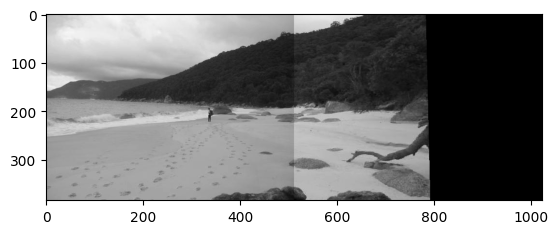

In [460]:
# Show results here
plt.imshow(new_im, cmap = 'gray')
plt.show()

In [461]:
# Demonstrate your understanding by answering the question below:
# Why are some pixels invalid after applying the homography matrix

## Answer: some pixels are out of range of the right image size, so they can't be found in the right image.

# Task 5: Better blending

In [462]:
# Write your code here

def auto_blending(im_left, im_right, H, k = 2.18, decrease_row = 0, decrease_col = 10, gaussian_blur = 1):
  ## using bilinear interpolation to get the RHS image
  im_right = image_bilinear_trans(im_right, H)

  ## stage 1 adjust the brightness 
  scal = im_right.mean() / im_left.mean() 
  im_right = im_right * scal * k

  ## stage 2 image stitching
  im_stitch = np.hstack((im_left, im_right))
  ## plot the image
  plt.imshow(im_stitch, cmap = 'gray')
  plt.title("brightness normalization")
  plt.show()
  
  ## get the size of the stitching image
  row = im_stitch.shape[0]
  col = im_stitch.shape[1]
  
  ## stage 3 adjust the width 
  for i in range(col):
    ## find the column containing all black pixels
    v = np.sum(im_stitch[:, i]).astype(int)
    if v == 0:
      im_blend = im_stitch[: row - decrease_row, :i - decrease_col]
      break

  ## plot the image
  plt.imshow(im_blend, cmap = 'gray')
  plt.title("width normalization")
  plt.show()

  ## stage 4 apply gaussian blur
  if gaussian_blur == 1:
    for n in range(1):
      g = 1/16 * np.array([[1, 2, 1],
                          [2, 4, 2],
                          [1, 2, 1]])
      for i in range(row - 2 - decrease_row):
        for j in range(round(col/2 - 15), round(col/2 + 15)):
          im_blend[i, j] = np.sum(im_blend[i : i+3, j : j+3] * g)
  ## plot the image
  plt.imshow(im_blend, cmap = 'gray')
  plt.title("gaussian normalization")
  plt.show()

  return im_blend

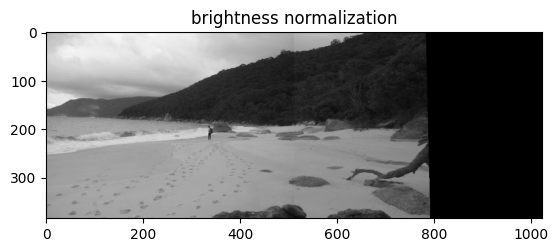

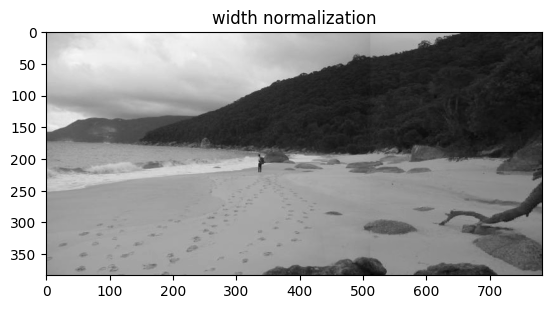

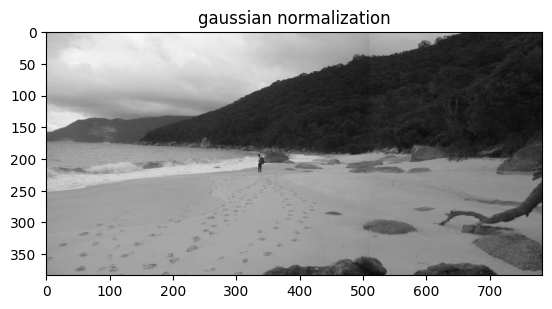

In [463]:
im_blend = auto_blending(im_left, im_right, H)

In [464]:
# Demonstrate your understanding by answering the question below:
# Describe the steps you have used to improve the blending process. Why were they effective? 

## Answer:
## I use 4 stages to improve the blending result. 
## In stage 1, I normalize the brightness of the 2 images, 
## this is very effective because the brightness difference decreased thus it looks like one image.
## In stage 2, combining the 2 images.
## In stage 3, adjusting the width of the image so no black pixels can be found.
## In stage 4, using gaussian blur to smooth the seam, so the line between 2 images is reduced.

# Task 6: Now try your own!

The shape the images is (400, 300)


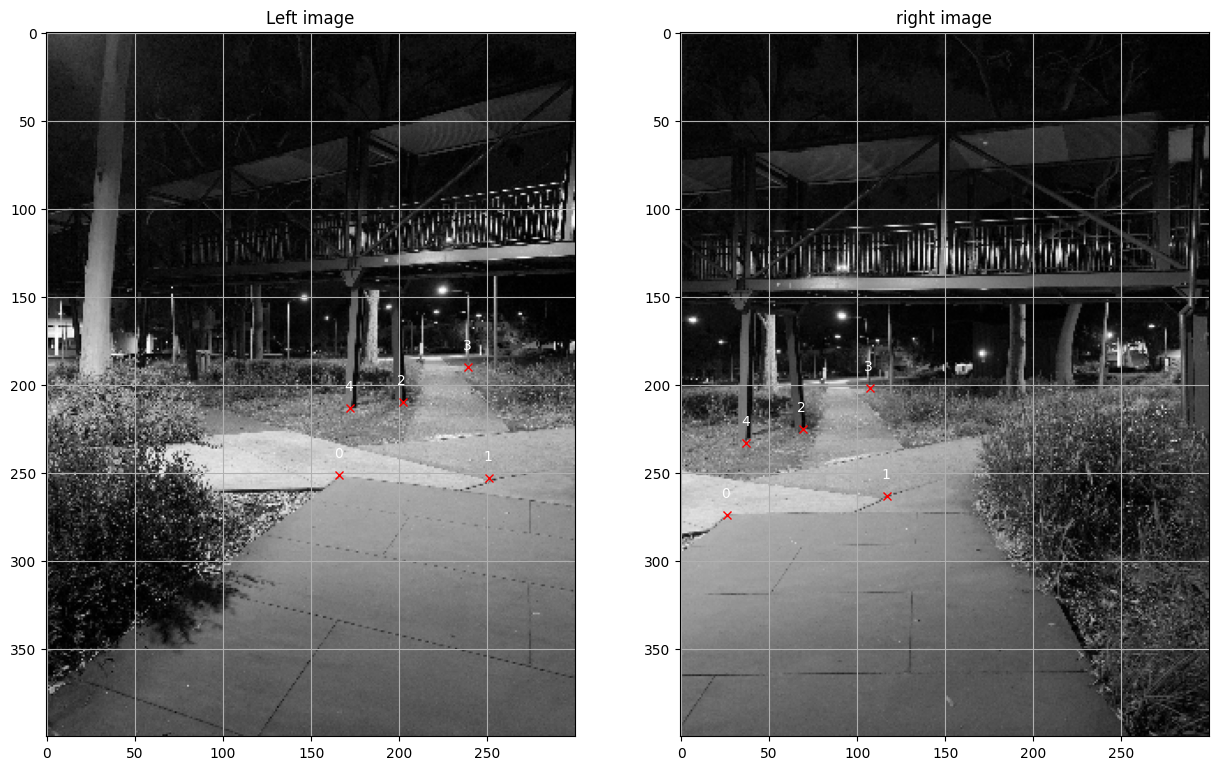

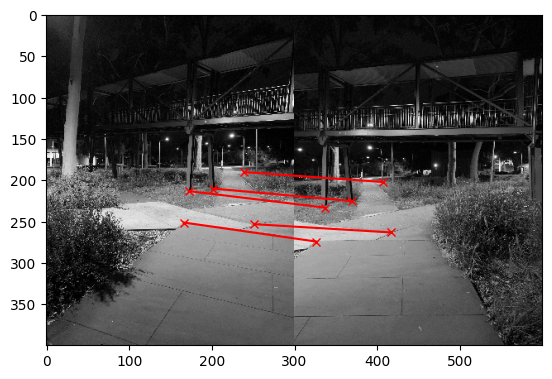

In [465]:
# Write your code here

## load the image
im_t6_left =  cv2.resize(cv2.cvtColor(cv2.imread('IMG_3422.jpg'), cv2.COLOR_BGR2GRAY), (300, 400))
im_t6_right = cv2.resize(cv2.cvtColor(cv2.imread('IMG_3423.jpg'), cv2.COLOR_BGR2GRAY), (300, 400))
print("The shape the images is", im_t6_left.shape)

## find the scr and dst points
xL = np.array([[166, 251, 1], 
               [251, 253, 1],
               [202, 210, 1],
               [239, 190, 1],
               [172, 213, 1]])
x_L, y_L, _ = xL.T

xR = np.array([[26, 274, 1], 
               [117, 263, 1],
               [69, 225, 1],
               [107, 202, 1],
               [37, 233, 1]])
x_R, y_R, _ = xR.T

plt.figure(figsize = (15, 10))
plt.subplot(1, 2, 1)
plt.imshow(im_t6_left, cmap = 'gray')
plt.plot(x_L, y_L, 'rx')
plt.title("Left image")
plt.grid()
## plot the text
for i in range(x_L.shape[0]):
  plt.text(x_L[i] - 3, y_L[i] - 10, i, c = 'w')

plt.subplot(1, 2, 2)
plt.imshow(im_t6_right, cmap = 'gray')
plt.plot(x_R, y_R, 'rx')
plt.title("right image")
plt.grid()
## plot the text
for i in range(x_L.shape[0]):
  plt.text(x_R[i] - 3, y_R[i] - 10, i, c = 'w')
plt.show()

## connect the same point pair
plt.imshow(np.hstack((im_t6_left, im_t6_right)), cmap = 'gray')
for i in range(xL.shape[0]):
  x = [x_L[i], x_R[i] + im_t6_left.shape[1]]
  y = [y_L[i], y_R[i]]
  plt.plot(x, y, 'rx-')

## find the homography matrix
h, _ = cv2.findHomography(xL[:, :2], xR[:, :2])

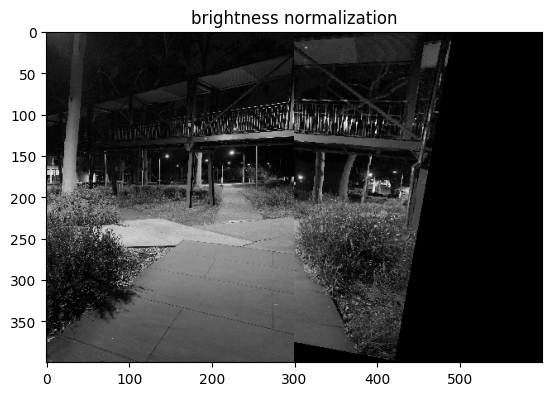

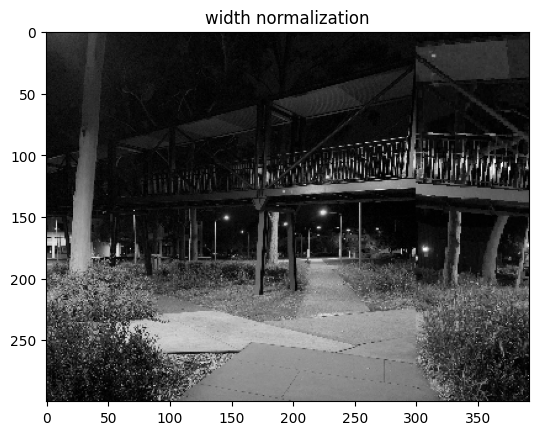

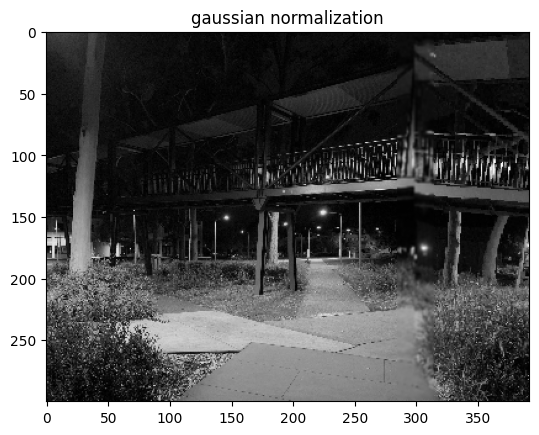

In [466]:
# Show results here
im_blend = auto_blending(im_t6_left, im_t6_right, h, k = 3.25, decrease_col = 100, decrease_row = 100, gaussian_blur = 1)

In [467]:
# Demonstrate your understanding by answering the question below:
# How did you adapt your previous code to solve this problem?  

## Answer: In the previous codes, I use mean values to calculate the brightness scale factor, then it mutiplied by a parameter k 
## to adjust the brightness, I need to change k to adjust the final brightness. Also, because task 6 RHS image is rotated so the row
## of the blending image also needs to be adjusted. Finaly, change the times of gaussian blur to get a better combination line.

# Do not remove or edit the following code snippet. 

When submitting your lab, please ensure that you have run the entire notebook from top to bottom. You can do this by clicking "Kernel" and "Restart Kernel and Run All Cells". Make sure the last cell (below) has also been run. However, you may need to download the required python libraries to do this first

If the code snippet does not run and you do not know how to download the required python libraries, you can do this instead:

1. Upload your completed jupyter notebook to Google Colab
2. Download your notebook as a .py file

In [468]:
file_name = str(student_id) + '_Lab2_Submission'
cmd = "jupyter nbconvert --to script Lab2_student_template.ipynb --output " + file_name
if(os.system(cmd)):
    print("Error converting to .py")
    print("cmd")